# Assignment 4
Using the datasets above: List_of_local_governments_in_Nigeria.csv, Nigeria_povertyrate_per_local_gov.csv and list-states-nigeria-227j

    1. Merge the datasets together to form a single table.
    2. Remove any redundant columns
    3. Clean the dataset to remove every null values
    4. Using either groupby or pivot_table calculate how population affects poverty rate of each local government
    5. Arrange each local goverment according to the order of their poverty rate

In [ ]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv(r"E:\Datasets\Nigeria data\list_of_local_government_areas_of_nigeria.csv")
df2 = pd.read_csv(r"E:\Datasets\Nigeria data\Nigeria povertyrate per local gov.csv")
df3 = pd.read_csv(r"E:\Datasets\Nigeria data\list-states-nigeria-227j.csv")

In [6]:
df1.head()

,SNo,Local Government Area,State
0,1,Abadam,Borno State
1,2,Abaji,FCT
2,3,Abak,Akwa Ibom State
3,4,Abakaliki,Ebonyi State
4,5,Aba North,Abia State


In [11]:

df2.drop_duplicates()
df2.head()

,ID_0,ISO,NAME_0,ID_12,NAME_12,ID_23,NAME_23,2014_Popul,Poverty_Ra,2014_Pover
0,163,NGA,Nigeria,1,Abia,1,Aba North,257689,0.017378,9661
1,163,NGA,Nigeria,1,Abia,2,Aba South,405791,0.094480,16070
2,163,NGA,Nigeria,1,Abia,3,Arochukw,193250,0.175241,40022
3,163,NGA,Nigeria,1,Abia,4,Bende,244399,0.129469,39410
4,163,NGA,Nigeria,1,Abia,5,Ikwuano,139157,0.111351,12145


In [14]:
df2.groupby('NAME_12')[['2014_Popul', 'Poverty_Ra', '2014_Pover']].sum()

,2014_Popul,Poverty_Ra,2014_Pover
NAME_12,,,
Abia,3729297,2.536265,449524
Adamawa,3543386,11.162622,1819978
Akwa Ibom,4696275,10.066511,1400426
Anambra,5436358,2.194231,462868
Bauchi,5849408,9.127692,2362825
Bayelsa,2030528,2.121381,513515
Benue,5375902,10.109827,2120714
Borno,5118764,9.067790,1345389
Cross River,3690425,8.850148,1650535


In [12]:
df3.head()

,SNo,Rank,State,Population,Unnamed: 4
0,1,1,Kano State,"94,01,288",NaN
1,2,2,Lagos State,"91,13,605",NaN
2,3,3,Kaduna State,"61,13,503",NaN
3,4,4,Katsina State,"58,01,584",NaN
4,5,5,Oyo State,"55,80,894",NaN


In [ ]:
# merging df1 and df2

df1_df2 = pd.merge(df1, df2, left_on='Local Government Area', right_on='NAME_23')

In [ ]:
merge1 = df1_df2[['SNo','Local Government Area', 'State', '2014_Popul', 'Poverty_Ra', '2014_Pover']]
merge1

,SNo,Local Government Area,State,2014_Popul,Poverty_Ra,2014_Pover
0,1,Abadam,Borno State,83113,0.396480,31093
1,2,Abaji,FCT,60985,0.243414,14320
2,3,Abak,Akwa Ibom State,153585,0.227546,33179
3,5,Aba North,Abia State,257689,0.017378,9661
4,6,Aba South,Abia State,405791,0.094480,16070
...,...,...,...,...,...,...
590,769,Zango,Katsina State,217949,0.558352,117828
591,771,Zaria,Kaduna State,448419,0.122632,21111
592,772,Zing,Taraba State,113311,0.494821,56127
593,773,Zurmi,Zamfara State,291140,0.486278,144487


In [19]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNo                    595 non-null    int64  
 1   Local Government Area  595 non-null    object 
 2   State                  595 non-null    object 
 3   2014_Popul             595 non-null    int64  
 4   Poverty_Ra             595 non-null    float64
 5   2014_Pover             595 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 28.0+ KB


In [22]:
final_merge = pd.merge(merge1, df3, on='State')

In [23]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNo_x                  591 non-null    int64  
 1   Local Government Area  591 non-null    object 
 2   State                  591 non-null    object 
 3   2014_Popul             591 non-null    int64  
 4   Poverty_Ra             591 non-null    float64
 5   2014_Pover             591 non-null    int64  
 6   SNo_y                  591 non-null    object 
 7   Rank                   591 non-null    object 
 8   Population             591 non-null    object 
 9   Unnamed: 4             0 non-null      float64
dtypes: float64(2), int64(3), object(5)
memory usage: 46.3+ KB


In [24]:
final_merge.drop(columns=['Unnamed: 4', 'SNo_y'], inplace=True)

In [ ]:
final_merge

,SNo_x,Local Government Area,State,2014_Popul,Poverty_Ra,2014_Pover,Rank,Population
0,1,Abadam,Borno State,83113,0.396480,31093,11,"41,71,104"
1,3,Abak,Akwa Ibom State,153585,0.227546,33179,15,"39,02,051"
2,5,Aba North,Abia State,257689,0.017378,9661,28,"28,45,370"
3,6,Aba South,Abia State,405791,0.094480,16070,28,"28,45,370"
4,8,Abeokuta South,Ogun State,366366,0.115300,37273,16,"37,51,140"
...,...,...,...,...,...,...,...,...
586,769,Zango,Katsina State,217949,0.558352,117828,4,"58,01,584"
587,771,Zaria,Kaduna State,448419,0.122632,21111,3,"61,13,503"
588,772,Zing,Taraba State,113311,0.494821,56127,33,"22,94,800"
589,773,Zurmi,Zamfara State,291140,0.486278,144487,21,"32,78,873"


In [26]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(final_merge):
    # Rename column 'SNo_x' to 'S\\N'
    final_merge = final_merge.rename(columns={'SNo_x': 'S\\N'})
    # Replace all instances of "," with "" in column: 'Population'
    final_merge['Population'] = final_merge['Population'].str.replace(",", "", case=False, regex=False)
    # Change column type to int32 for column: 'Population'
    final_merge = final_merge.astype({'Population': 'int32'})
    return final_merge

final_merge_clean = clean_data(final_merge.copy())
final_merge_clean.head()

,S\N,Local Government Area,State,2014_Popul,Poverty_Ra,2014_Pover,Rank,Population
0,1,Abadam,Borno State,83113,0.396480,31093,11,4171104
1,3,Abak,Akwa Ibom State,153585,0.227546,33179,15,3902051
2,5,Aba North,Abia State,257689,0.017378,9661,28,2845370
3,6,Aba South,Abia State,405791,0.094480,16070,28,2845370
4,8,Abeokuta South,Ogun State,366366,0.115300,37273,16,3751140


In [43]:
# Using either groupby or pivot_table calculate how population affects poverty rate of each local government

df = final_merge_clean.groupby('Local Government Area')[['2014_Popul', 'Poverty_Ra']].mean().reset_index()
df.head()

,Local Government Area,2014_Popul,Poverty_Ra
0,Aba North,257689.0,0.017378
1,Aba South,405791.0,0.094480
2,Abadam,83113.0,0.396480
3,Abak,153585.0,0.227546
4,Abeokuta South,366366.0,0.115300


In [40]:
df.sort_values('Poverty_Ra', ascending=False)

,Local Government Area,2014_Popul,Poverty_Ra
237,Ikwo,215257.0,0.914384
152,Ezza South,168892.0,0.903956
422,Ohaukwu,253736.0,0.862090
151,Ezza North,158054.0,0.844616
421,Ohaozara,167245.0,0.842780
...,...,...,...
72,Bida,240860.0,0.018769
0,Aba North,257689.0,0.017378
547,Uvwie,289312.0,0.016641
507,Sokoto North,246991.0,0.009919


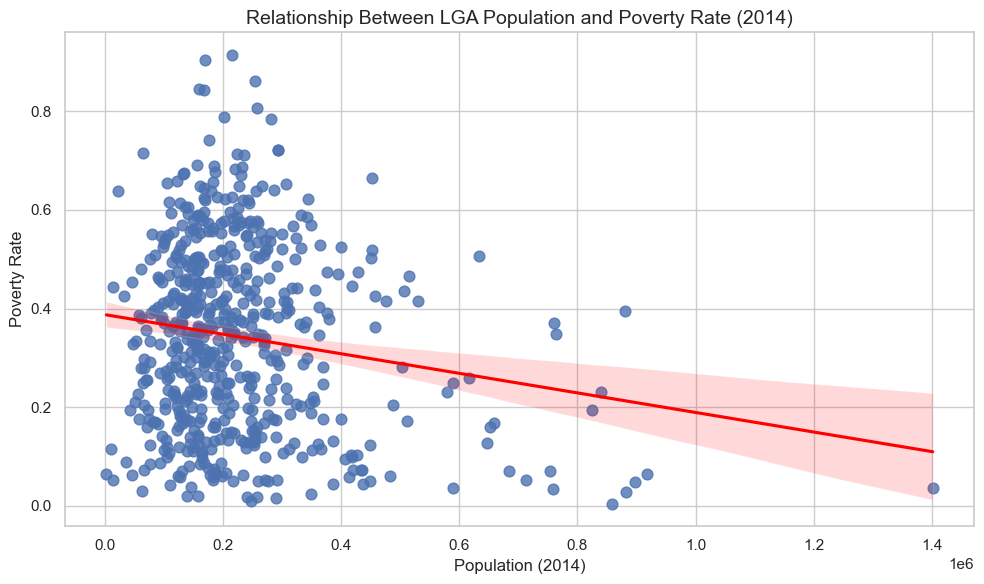

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plot
sns.set_theme(style="whitegrid")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='2014_Popul', y='Poverty_Ra', scatter_kws={"s": 60}, line_kws={"color": "red"})

plt.title("Relationship Between LGA Population and Poverty Rate (2014)", fontsize=14)
plt.xlabel("Population (2014)", fontsize=12)
plt.ylabel("Poverty Rate", fontsize=12)
plt.tight_layout()
plt.show()
